In [9]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [41]:
milk = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\milk.csv", index_col = 0)
milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, HORSE to DOLPHIN
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    25 non-null     float64
 1   protein  25 non-null     float64
 2   fat      25 non-null     float64
 3   lactose  25 non-null     float64
 4   ash      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [17]:
scaler = StandardScaler().set_output(transform = 'pandas')
milk_scaled = scaler.fit_transform(milk)

- Column 1 (mergings[i, 0]): The index of the first cluster (or point) being merged.
- Column 2 (mergings[i, 1]): The index of the second cluster (or point) being merged.
- Column 3 (mergings[i, 2]): The distance (or linkage) between the two clusters that were merged.
- Column 4 (mergings[i, 3]): The total number of original observations in the newly formed cluster.

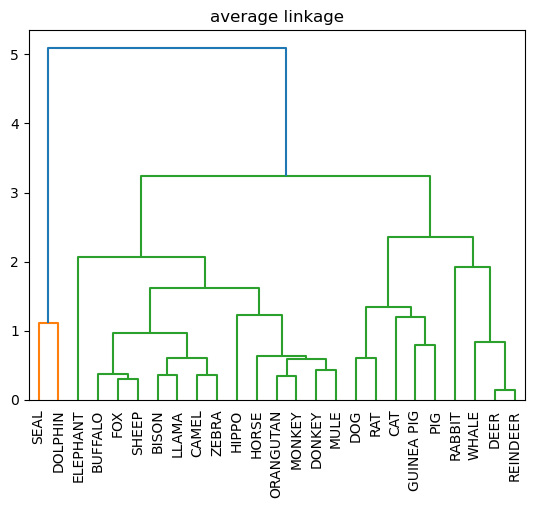

In [53]:
link = 'average'
mergings = linkage(milk_scaled, method = link)
dendrogram(mergings, labels = list(milk_scaled.index))
plt.title(link + ' linkage')
plt.xticks(fontsize= 10, rotation=90)
plt.show()

In [45]:
mergings

array([[20.        , 21.        ,  0.14557691,  2.        ],
       [10.        , 15.        ,  0.30903062,  2.        ],
       [ 1.        ,  2.        ,  0.34704952,  2.        ],
       [ 6.        , 11.        ,  0.35975407,  2.        ],
       [ 5.        , 14.        ,  0.36090936,  2.        ],
       [ 7.        , 26.        ,  0.36925133,  3.        ],
       [ 3.        , 12.        ,  0.42572471,  2.        ],
       [27.        , 31.        ,  0.5853266 ,  4.        ],
       [28.        , 29.        ,  0.59940787,  4.        ],
       [16.        , 19.        ,  0.61176231,  2.        ],
       [ 0.        , 32.        ,  0.62923999,  5.        ],
       [ 8.        , 13.        ,  0.78713165,  2.        ],
       [22.        , 25.        ,  0.83150788,  3.        ],
       [30.        , 33.        ,  0.97124069,  7.        ],
       [23.        , 24.        ,  1.10551437,  2.        ],
       [ 9.        , 36.        ,  1.20249687,  3.        ],
       [ 4.        , 35.

In [113]:
clust = AgglomerativeClustering(n_clusters = 9, linkage = 'average')
clust.fit(milk_scaled)
clust.labels_

array([3, 3, 3, 3, 8, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2, 2, 7, 4, 5, 7, 6, 6,
       6, 1, 1], dtype=int64)

In [115]:
milk_scaled.index

Index(['HORSE', 'ORANGUTAN', 'MONKEY', 'DONKEY', 'HIPPO', 'CAMEL', 'BISON',
       'BUFFALO', 'GUINEA PIG', 'CAT', 'FOX', 'LLAMA', 'MULE', 'PIG', 'ZEBRA',
       'SHEEP', 'DOG', 'ELEPHANT', 'RABBIT', 'RAT', 'DEER', 'REINDEER',
       'WHALE', 'SEAL', 'DOLPHIN'],
      dtype='object', name='Animal')

In [117]:
import seaborn as sns

In [119]:
df_clust = pd.DataFrame({'Animal' : milk_scaled.index.tolist(), 'cluster' : clust.labels_})
df_clust.sort_values(by = 'cluster')

,Animal,cluster
13,PIG,0
8,GUINEA PIG,0
9,CAT,0
24,DOLPHIN,1
23,SEAL,1
15,SHEEP,2
14,ZEBRA,2
5,CAMEL,2
6,BISON,2
7,BUFFALO,2


### silhouette score
- more the cohesivity more will be the score
- more the distance between clusters(b-a) more will be silhouette score

In [121]:
silhouette_score(milk_scaled , clust.labels_)

0.3881238240611902

In [134]:
scores = []
n_clust = [2,3,4,5,6,7]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters = i, linkage = 'average')
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled , clust.labels_))
np.argmax(scores)
f"best no. of clusters :-- {n_clust[np.argmax(scores)]}"

'best no. of clusters :-- 2'

- - generlly we go with the best silhouette score number of clustering i.e in our example's caase 2

In [141]:
clust = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
clust.fit(milk_scaled)
(silhouette_score(milk_scaled , clust.labels_))

0.5186847578981009

## another dataset

In [147]:
usa = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\USArrests.csv", index_col = 0)
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [149]:
usa

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [163]:
usa_scal = StandardScaler().set_output(transform = 'pandas').fit_transform(usa)

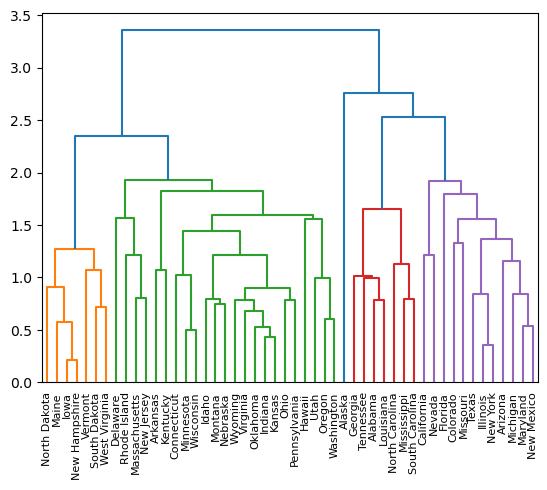

In [167]:
mergings = linkage(usa_scal, method = 'average')
dendrogram(mergings, labels = usa_scal.index.tolist())
plt.show()

In [185]:
scores = []
for i in range(2,30):
    clust = AgglomerativeClustering(n_clusters = i, linkage = 'average')
    clust.fit(usa_scal)
    scores.append(silhouette_score(usa_scal, clust.labels_))
f"the best score is on {np.argmax(scores)+2} splits"

'the best score is on 2 splits'

In [189]:
clust = AgglomerativeClustering(n_clusters = 2, linkage = 'average')
clust.fit(usa_scal)
silhouette_score(usa_scal, clust.labels_)

0.4084890326217641

In [191]:
df_clust = pd.DataFrame({'city' : usa_scal.index.tolist(), 'cluster' : clust.labels_})
df_clust.sort_values(by = 'cluster')

,city,cluster
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0
